In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
def delete_null_value_above_sixty_percent():
    row,columns=df.shape
    for feature in df:
        if df[feature].isnull().sum()>(0.6*row):
            del df[feature]
            print(feature)
delete_null_value_above_sixty_percent()

Alley
PoolQC
Fence
MiscFeature


# MSSubClass

In [5]:
df['SalePrice'].max()

755000

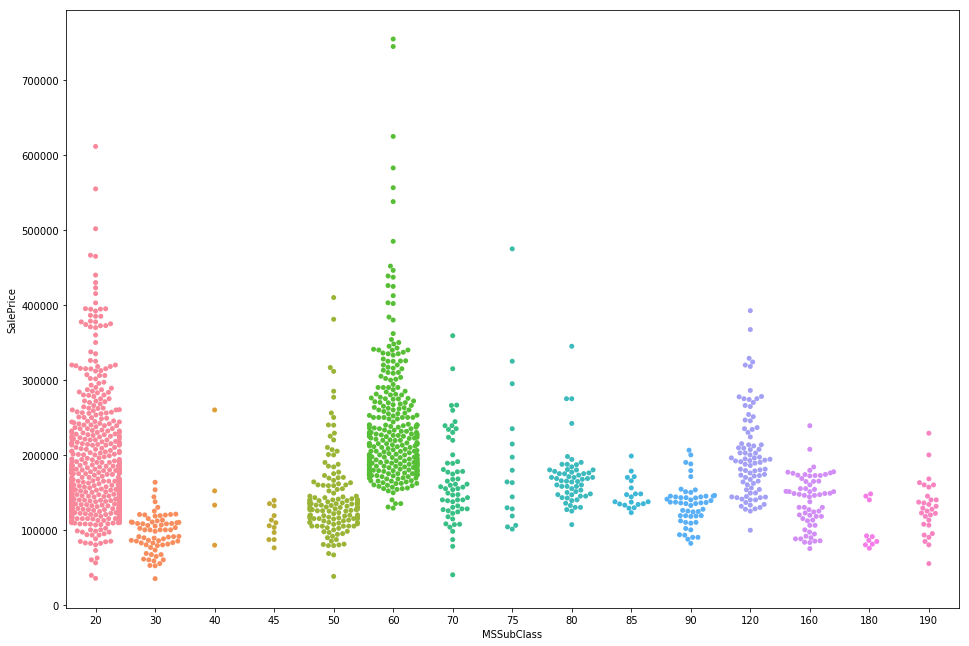

In [6]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="MSSubClass", y="SalePrice", data=df)

In [7]:
len(df[df['SalePrice']>500000])

9

In [8]:
len(df[df['MSSubClass']==20])

536

In [9]:
len(df[df['MSSubClass']==60])

299

# MSZoning

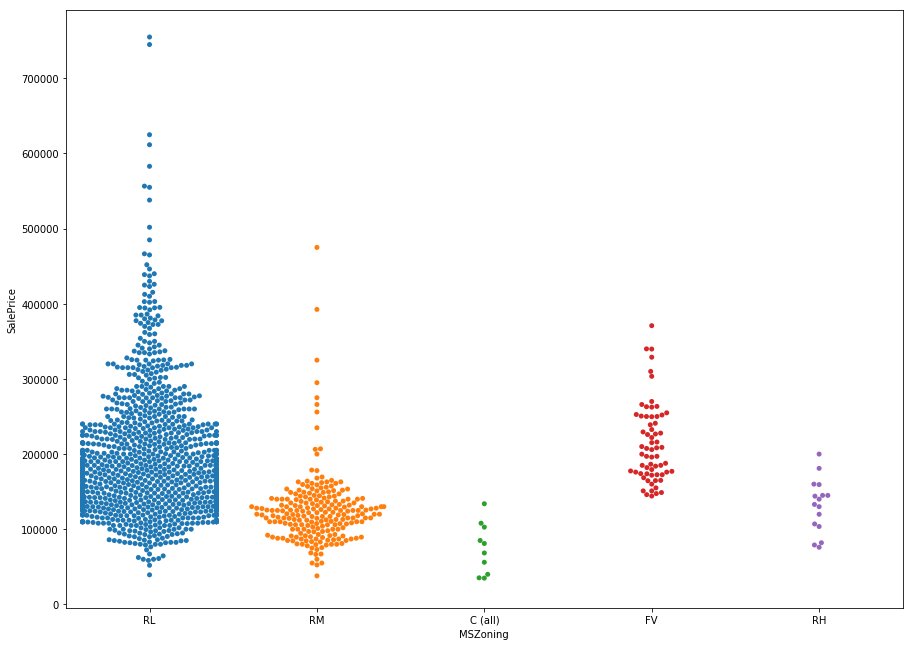

In [10]:
a4_dims=(15,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="MSZoning", y="SalePrice", data=df)

In [11]:
len(df[df['MSZoning']=='RL'])

1151

In [12]:
len(df[df['MSZoning']=='RH'])

16

In [13]:
len(df[(df['MSSubClass']==60) & (df['MSZoning']=='RL')])

273

In [14]:
len(df[(df['MSSubClass']==20) & (df['MSZoning']=='RL')])

508

# LotArea

In [15]:
df['LotArea']=df['LotArea']/1000
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8.45,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9.60,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11.25,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9.55,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14.26,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


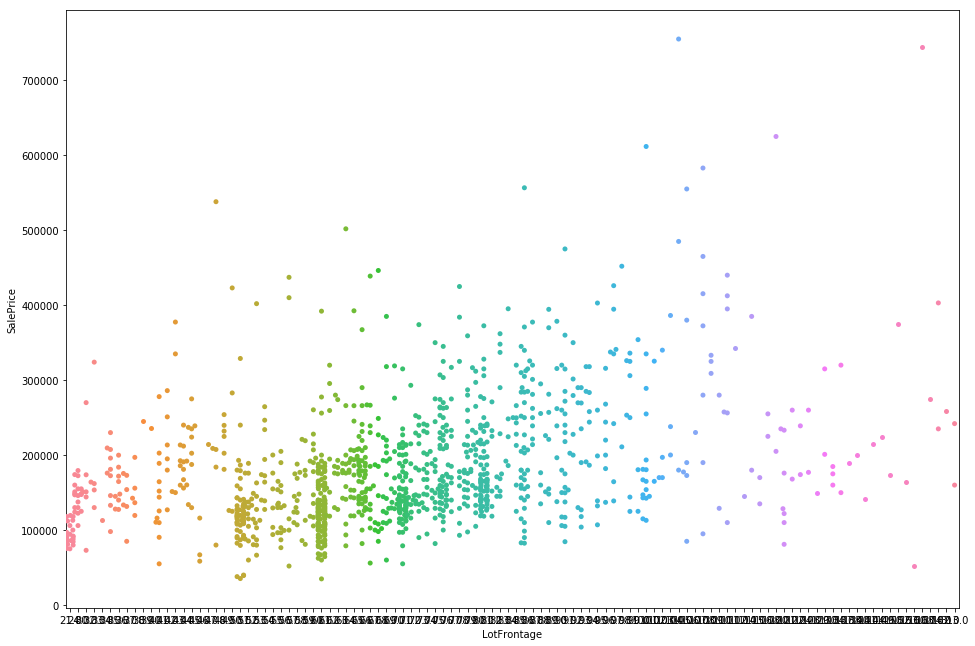

In [16]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="LotFrontage", y="SalePrice", data=df)

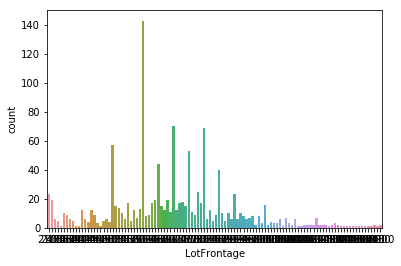

In [17]:
sns.countplot(x='LotFrontage',data=df)

In [18]:
df['SalePrice'][df['LotArea']==df['LotArea'].min()]

956    124000
Name: SalePrice, dtype: int64

In [19]:
df['LotArea'].max()

215.245

In [20]:
df['SalePrice'][df['LotArea']==df['LotArea'].max()]

313    375000
Name: SalePrice, dtype: int64

In [21]:
df['LotArea'][df['SalePrice']==df['SalePrice'].max()]

691    21.535
Name: LotArea, dtype: float64

# Streets

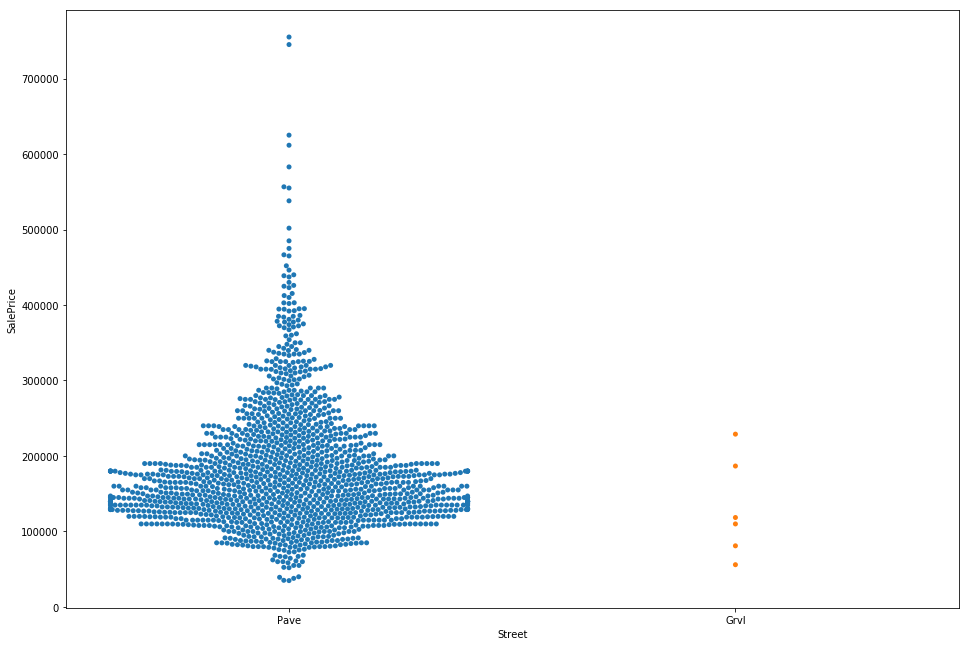

In [22]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="Street", y="SalePrice", data=df)

In [23]:
len(df[df['Street']=='Pave'])

1454

# LotShape

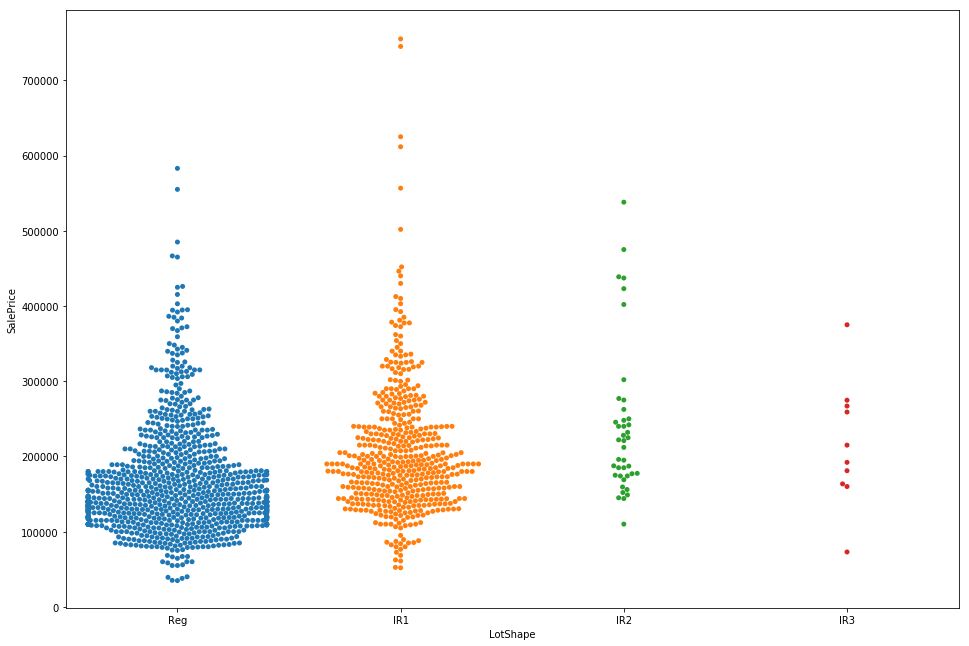

In [24]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="LotShape", y="SalePrice", data=df)

In [25]:
len(df[df['LotShape']=='Reg'])

925

In [26]:
len(df[df['LotShape']=='IR1'])

484

# LandContour

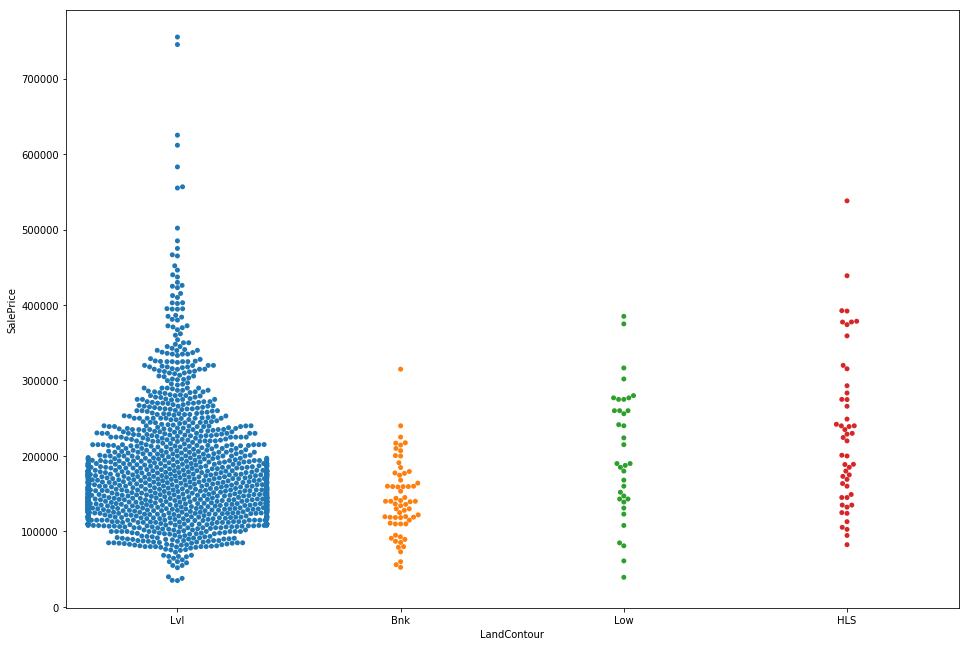

In [27]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="LandContour", y="SalePrice", data=df)

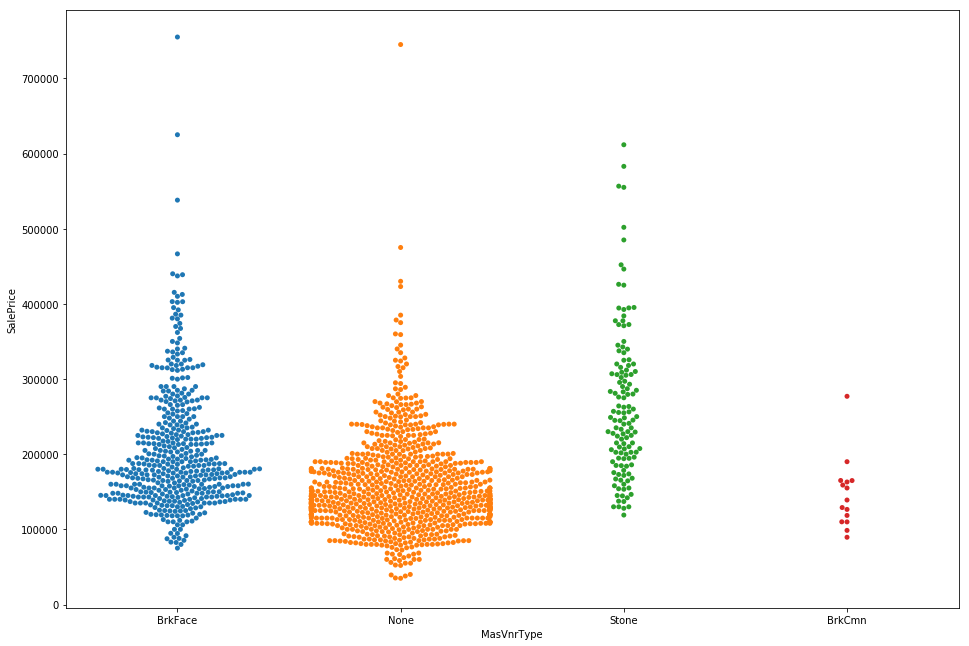

In [28]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="MasVnrType", y="SalePrice", data=df)

In [29]:
len(df[df['LandContour']=='Lvl'])

1311

# Utilities	

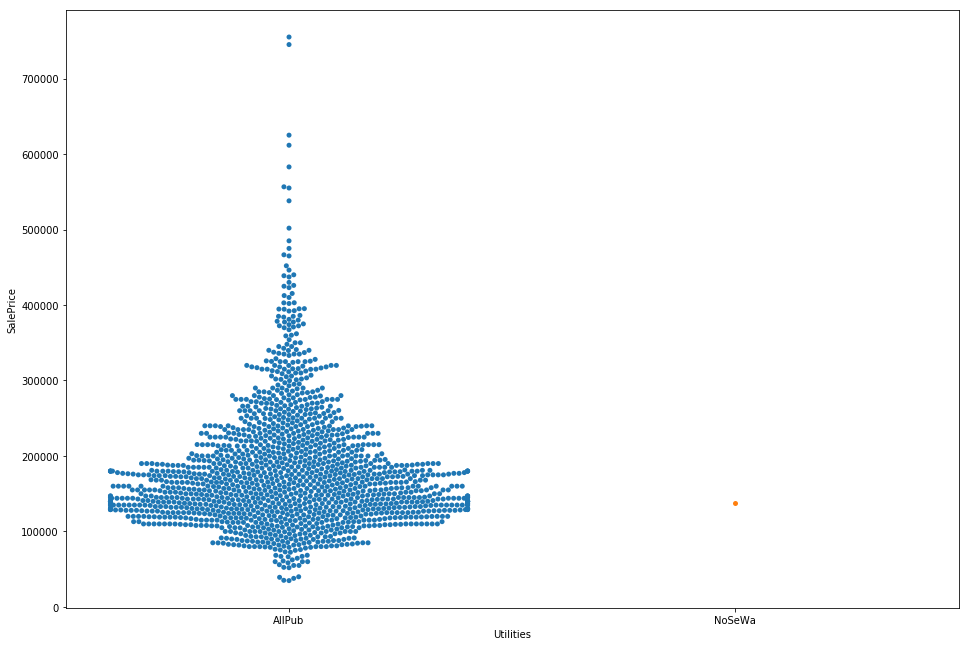

In [30]:
a4_dims=(16,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x="Utilities", y="SalePrice", data=df)

In [31]:
len(df[df['Utilities']=='AllPub'])

1459

In [32]:
df['LotFrontage'].median()

69.0

In [33]:
linreg = LinearRegression()
data = df[['MSSubClass','LotArea','LotFrontage']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['LotFrontage'].notnull()].drop(columns='LotFrontage')
y_train = data[data['LotFrontage'].notnull()]['LotFrontage']
x_test = data[data['LotFrontage'].isnull()].drop(columns='LotFrontage')
y_test = data[data['LotFrontage'].isnull()]['LotFrontage']
#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
df.LotFrontage[df.LotFrontage.isnull()] = predicted

S:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8.45,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9.60,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11.25,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9.55,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14.26,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
df['BsmtQual']

0        Gd
1        Gd
2        Gd
3        TA
4        Gd
5        Gd
6        Ex
7        Gd
8        TA
9        TA
10       TA
11       Ex
12       TA
13       Gd
14       TA
15       TA
16       TA
17      NaN
18       TA
19       TA
20       Ex
21       TA
22       Gd
23       Gd
24       TA
25       Gd
26       TA
27       Ex
28       TA
29       TA
       ... 
1430     Gd
1431     Gd
1432     TA
1433     Gd
1434     TA
1435     TA
1436     TA
1437     Ex
1438     TA
1439     TA
1440     Ex
1441     Gd
1442     Ex
1443     TA
1444     Gd
1445     TA
1446     TA
1447     Gd
1448     Fa
1449     Gd
1450     Gd
1451     Gd
1452     Gd
1453     Gd
1454     Gd
1455     Gd
1456     Gd
1457     TA
1458     TA
1459     TA
Name: BsmtQual, Length: 1460, dtype: object

In [36]:
for feature in df:
        if df[feature].isnull().sum()>0:
            print(feature)

MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [37]:
print(df['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [38]:
df1=[]
df2=[]
df3=[]
for feature in df:
    if df[feature].dtypes=='object' and df[feature].isnull().sum()>0:
        df1.append(feature)
    elif df[feature].dtypes=='object' and df[feature].isnull().sum()==0:
        df2.append(feature)
    else:
        df3.append(feature)
        

l1=pd.get_dummies(df[df1])
l2=pd.get_dummies(df[df2],dummy_na=True)



,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
9,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
